# Module 2 Part 2:  Probability Distributions

# Table of Contents

This module consists of 3 parts:

**Part 1** - Introduction to Probability

**Part 2** - Probability Distributions

**Part 3** - the Bayesian framework and Random Variables

Each part is provided in a separate notebook file. It is recommended that you follow the order of the notebooks.

Part 2:

* [Probability Distributions](#Probability_Distributions)


* [Multiple_Random_Processes](#Multiple_Random_Processes)
    * [Independent_Events](#Independent_Events)
    * [Multiplication_rule_for_independent_processes](#Multiplication_rule_for_independent_processes)
    * [Conditional Probability](#Conditional_Probability)
    * [Marginal and Joint Probabilities](#Marginal_and_Joint_Probabilities)
    * [The general multiplication rule](#The_general_multiplication_rule)
    * [Sum of conditional probabilities](#Sum_of_conditional_probabilities)
    * [Independence considerations in conditional probability](#Independence_considerations_in_conditional_probability)
    
Part 3:
* Bayes' Theorem
    * The bayesian framework


* Properties of Random Variables
    * Expectation_of_a_random_variable
    * Variability in expectation


<a id='Probability_Distributions'></a>
# Probability Distributions

A **probability distribution** is a list of possible outcomes with corresponding probabilities that satisfies three rules:

  **Rule 1**: The outcomes listed must be disjoint (mutually exclusive)
  
  **Rule 2**: Each probability must be between 0 and 1 
  
  **Rule 3**: The probabilities must total 1 (collectively exhaustive)

**Exercise 1** (Diez et al, 2017)  
The table below suggests three distributions for household income in the United States. Only one is possible (the correct one). Which one must it be?


| Income Range ('$1000s)   | 0-25      | 25-50     | 50-100    |100+       |                                     
| :----------------------: |:---------:|:---------:|:---------:|:---------:|
| Distribution A           |0.18       |0.39       |0.33       |0.16       |
| Distribution B           |0.38       |-0.27      |0.52       |0.37       |
| Distribution C           |0.27       |0.28       |0.29       |0.16       |

Let's create a chart with the values above and calculate the cumulative values to help you make the correct decision.

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats

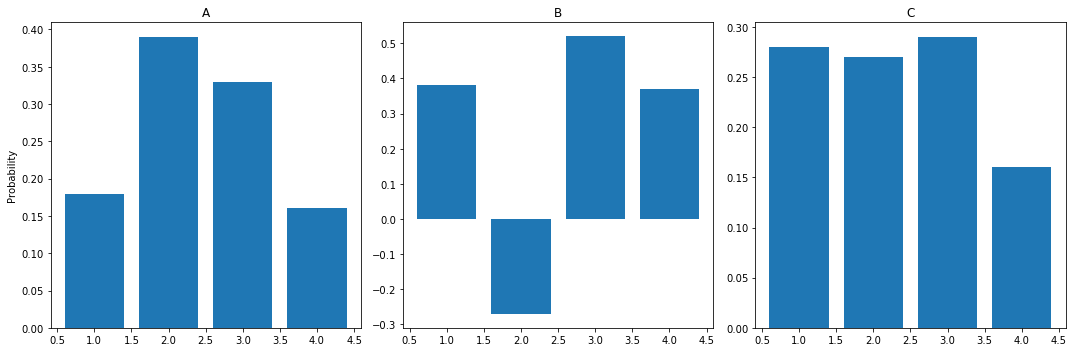

In [2]:
a = np.array([0.18,0.39,0.33,0.16])
b = np.array([0.38,-0.27,0.52,0.37])
c = np.array([0.28,0.27,0.29,0.16])
x = np.array([1,2,3,4])

plt.figure(figsize=(15, 5))
ax = plt.subplot(131)
ax.bar(x,a); 
ax.set_title("A")
ax.set_ylabel("Probability")
ax = plt.subplot(132)
ax.bar(x,b); 
ax.set_title("B")
ax = plt.subplot(133)
ax.bar(x,c); 
ax.set_title("C")
plt.tight_layout()
plt.show()

In [3]:
np.sum(a), np.sum(b), np.sum(c)

(1.06, 1.0, 1.0)

Your work goes here - type in your reasoning before you view the solution









**Solution**

Probabilities must add up and each value has to be between 0 and 1.  Only the third row fulfills both requirements.

Each row, starting at the top of the table, is evaluated below

 Row 1. Does not add up to 1, violates rule 3

 Row 2. It has negative values, violates rule 2 

 Row 3. Abide to the three rules, it is a viable distribution function

**Example:  Simulation of random events**

Random events can be simulated using Python.  Behind the scenes there are pseudo-random generating algorithms that allow us to mimic a lot of experiments.  Such practices are referred as simulations.

In [5]:
dice_rolls = np.arange(1,7)
coin_flips = np.arange(1,3)

print(dice_rolls)
print(coin_flips)

[1 2 3 4 5 6]
[1 2]


Let's look at the dice roll first.
  
We will use the dice_rolls range to simulate the experiment of rolling a die.  As you increase the number of trials in the range() statement, the histogram will tend towards a uniform distribution.  By default all numbers has the same probability.

Text(0, 0.5, 'Frequency')

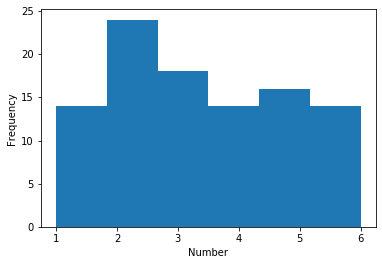

In [5]:
all_rolls=[]
for i in range(100):
    roll = np.random.choice(dice_rolls)
    all_rolls.append(roll)

plt.hist(all_rolls, bins = 6) 
plt.xlabel("Number")
plt.ylabel("Frequency")

The resulting histogram shows the distribution of rolls from 1 to 6. After 100 rolls, the distribution is not uniform.

**Exercise 2:**
Simulate that you are rolling two dice and plot the probability distribution.  You should get the triangular distribution you see below.

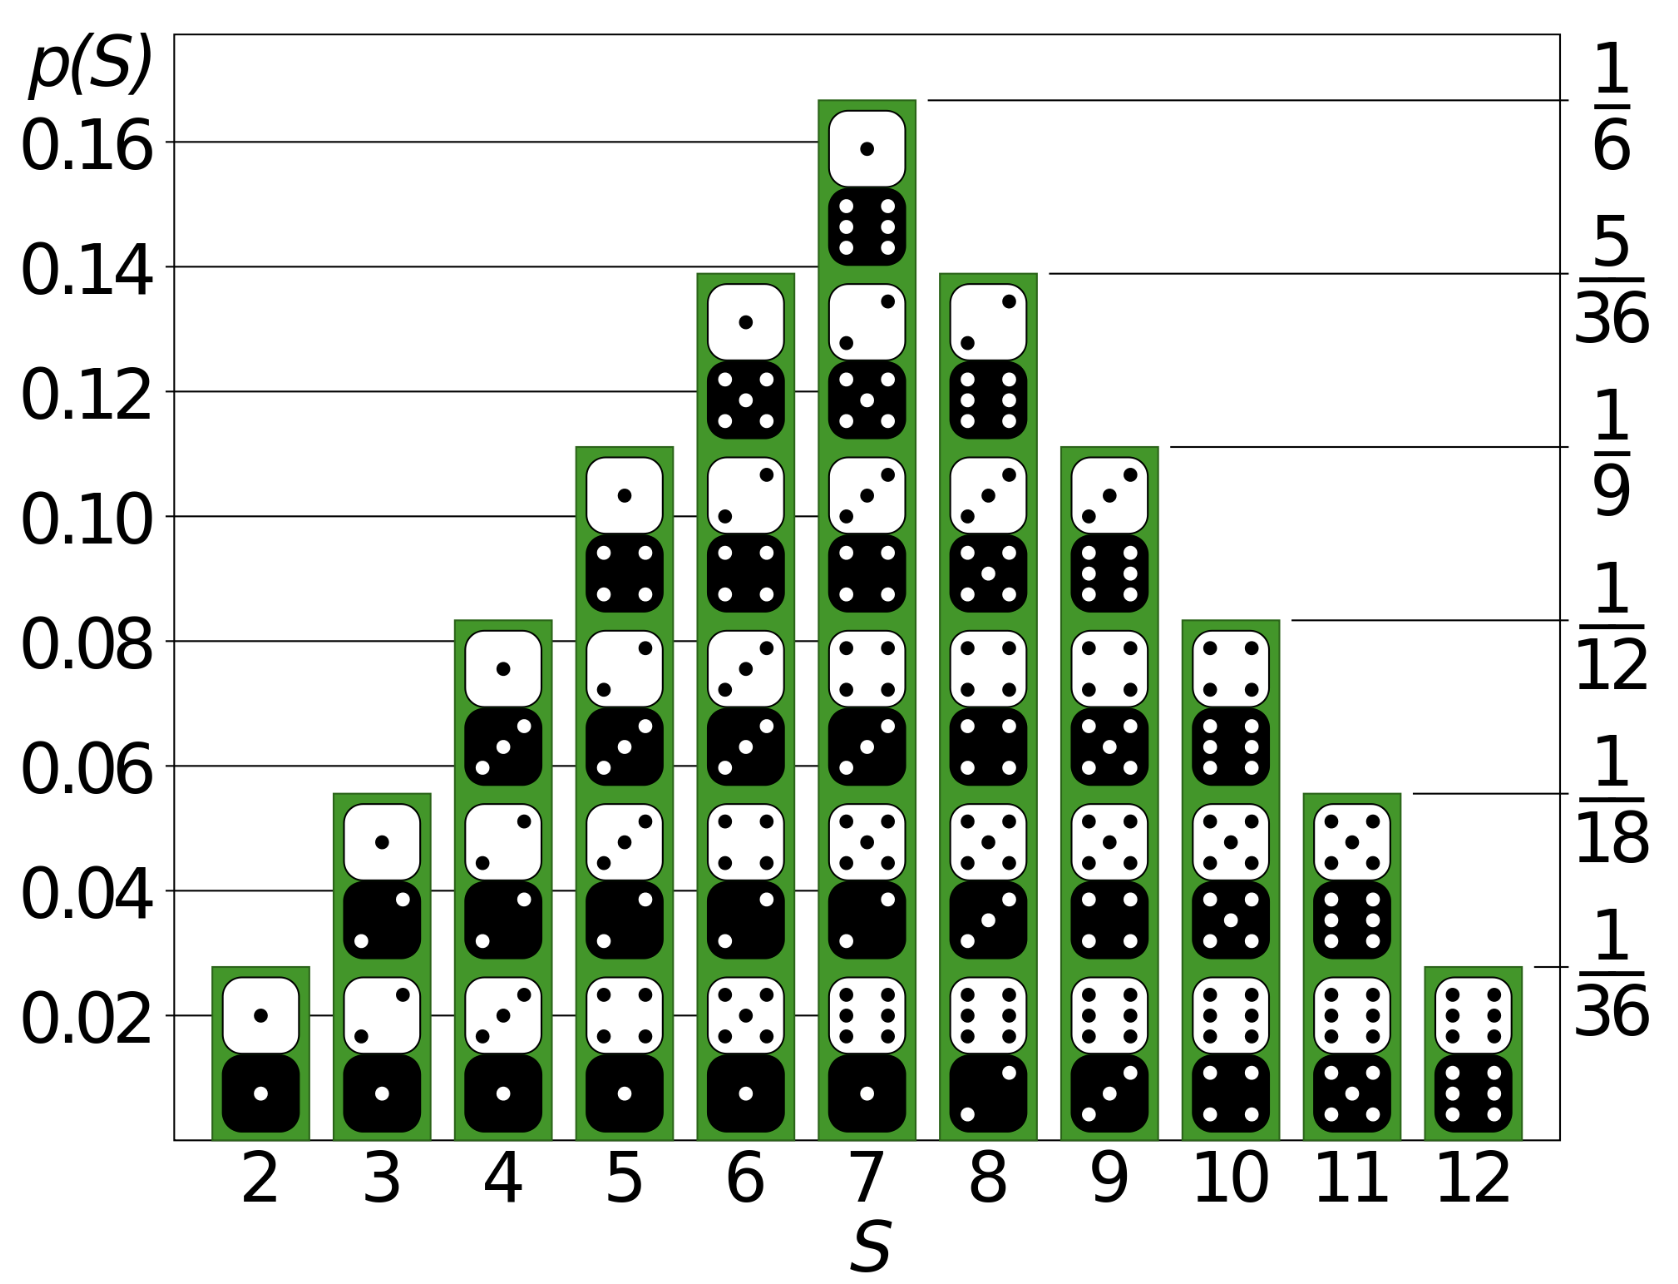

A distribution of fair 2-dice rolls. Triangular in shape; ranging across all possible rolls (2-12); centred on 7. 

Image source: Dice Distribution (bar).svg, (2006).


In [6]:
#your code here

Text(0, 0.5, 'Frequency')

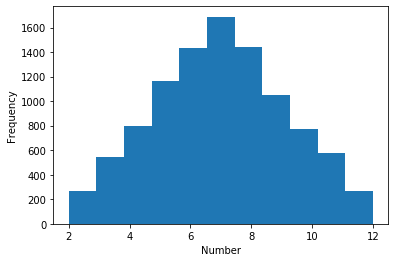

In [15]:
all_rolls = []
for i in range(10000):
    roll_1 = np.random.choice(dice_rolls)
    roll_2 = np.random.choice(dice_rolls)
    all_rolls.append(roll_1 + roll_2)
    
plt.hist(all_rolls, bins = 11)
plt.xlabel("Number")
plt.ylabel("Frequency")


**Solution**

Text(0, 0.5, 'Frequency')

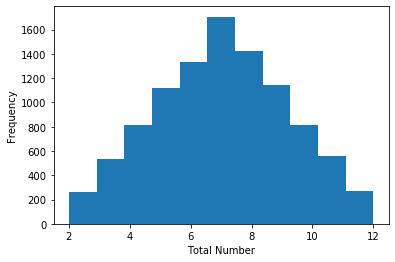

In [7]:
all_rolls=[]
for i in range(10000):
    roll_1 = np.random.choice(dice_rolls)
    roll_2 = np.random.choice(dice_rolls)
    all_rolls.append(roll_1+roll_2)

plt.hist(all_rolls, bins=11)
plt.xlabel("Total Number")
plt.ylabel("Frequency")
    
#data = [go.Histogram(x=all_rolls, histnorm='probability')]
#iplot(data)

<a id='Multiple_Random_Processes'></a>
# Multiple Random Processes

<a id='Independent_events'></a>
## Independent events

Just as variables and observations can be independent, random processes can be independent, too. Two processes are independent if knowing the outcome of one provides no useful information about the outcome of the other.

For instance, flipping a coin and rolling a die are two independent processes – knowing the coin was heads does not help deter- mine the outcome of a die roll. On the other hand, stock prices usually move up or down together, so they are not independent.

<a id='Multiplication_rule for independent_processes'></a>
## Multiplication rule for independent processes

If A and B represent events from two diferent and independent processes, then the probability that both A and B occur can be calculated as the product of their separate probabilities:

$$
P(A \ and \ B) = P(A\cap B)=P(A) \cdot P(B)
$$

Similarly, if there are k events $A_1$, ..., $A_k$ from k independent processes, then the probability they all occur is 

$$
P(A_1 \ and \ A_2 \ ... \ A_k) = P(A_1\cap A_2 ... \ \cap A_k)=P(A_1) \cdot P(A_2) \ ... \  \cdot P(A_k)
$$

Let's simulate two independent events, rolling two dice, and calculate the probability that both dice yield a 6.

In [1]:
# The plotly package is used here. 
# The package can be installed with `pip install plotly`

import random
import pandas as pd
import numpy as np

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode()
import plotly.graph_objs as go
import plotly

def plot_probs(x_, y_):
    trace = go.Scatter(
        x = x_,
        y = y_
    )

    layout = go.Layout(
        xaxis=dict(
            title='Number of Simulations'
        ),
        yaxis=dict(
            title='Probability'
        )
    )

    fig = go.Figure(data = [trace], layout = layout)
    return fig

In [2]:
dice_rolls = np.arange(1,7)
count_hits = 0
x_data = []
y_data = []

for num_simulations in range(1, 10001):
    roll_1 = np.random.choice(dice_rolls)
    roll_2 = np.random.choice(dice_rolls)
    if (roll_1 == 6) & (roll_2 == 6) :
        count_hits += 1
    if (num_simulations % 10) == 0:
        y_data.append(float(count_hits) / float(num_simulations))
        x_data.append(num_simulations)

# Plot the figure
fig = plot_probs(x_data, y_data)
iplot(fig)

According to the general equation $P(A_6 \ and \ B_6) = P(A_6) \cdot P(B_6)= \frac{1}{6} \cdot  \frac{1}{6} = \frac{1}{36}$ = 0.0278 which is close to the number obtained from the simulation.

<a id='Conditional_Probability'></a>
##  Conditional Probability

Let's introduce the concepts with an example:  The family_college data set (Diez et al, 2017). The data set contains a sample of 792 cases with two variables, teen and parents, and is summarized in the table below. The teen variable is either college or not, where the college label means the teen went to college immediately after high school. The parents variable takes the value degree if at least one parent of the teenager completed a college degree. We want to explore if there is any relation between teens going to college to the fact that their parents completed a degree.

The contingency table for the data is shown below:

| Teen / Parents       | Parent Degree   |Parent No Degree      |Total    |
| :-----------: |:-------: |:-------:|:-------:|
| Teen College       |231       |214      |445      |                               
| Teen Not           |49        |298      |347      |
| Parent Total         |280       |512      |792      |
 
Table of data representing parents and their teenage children who have or have not received a college degree.

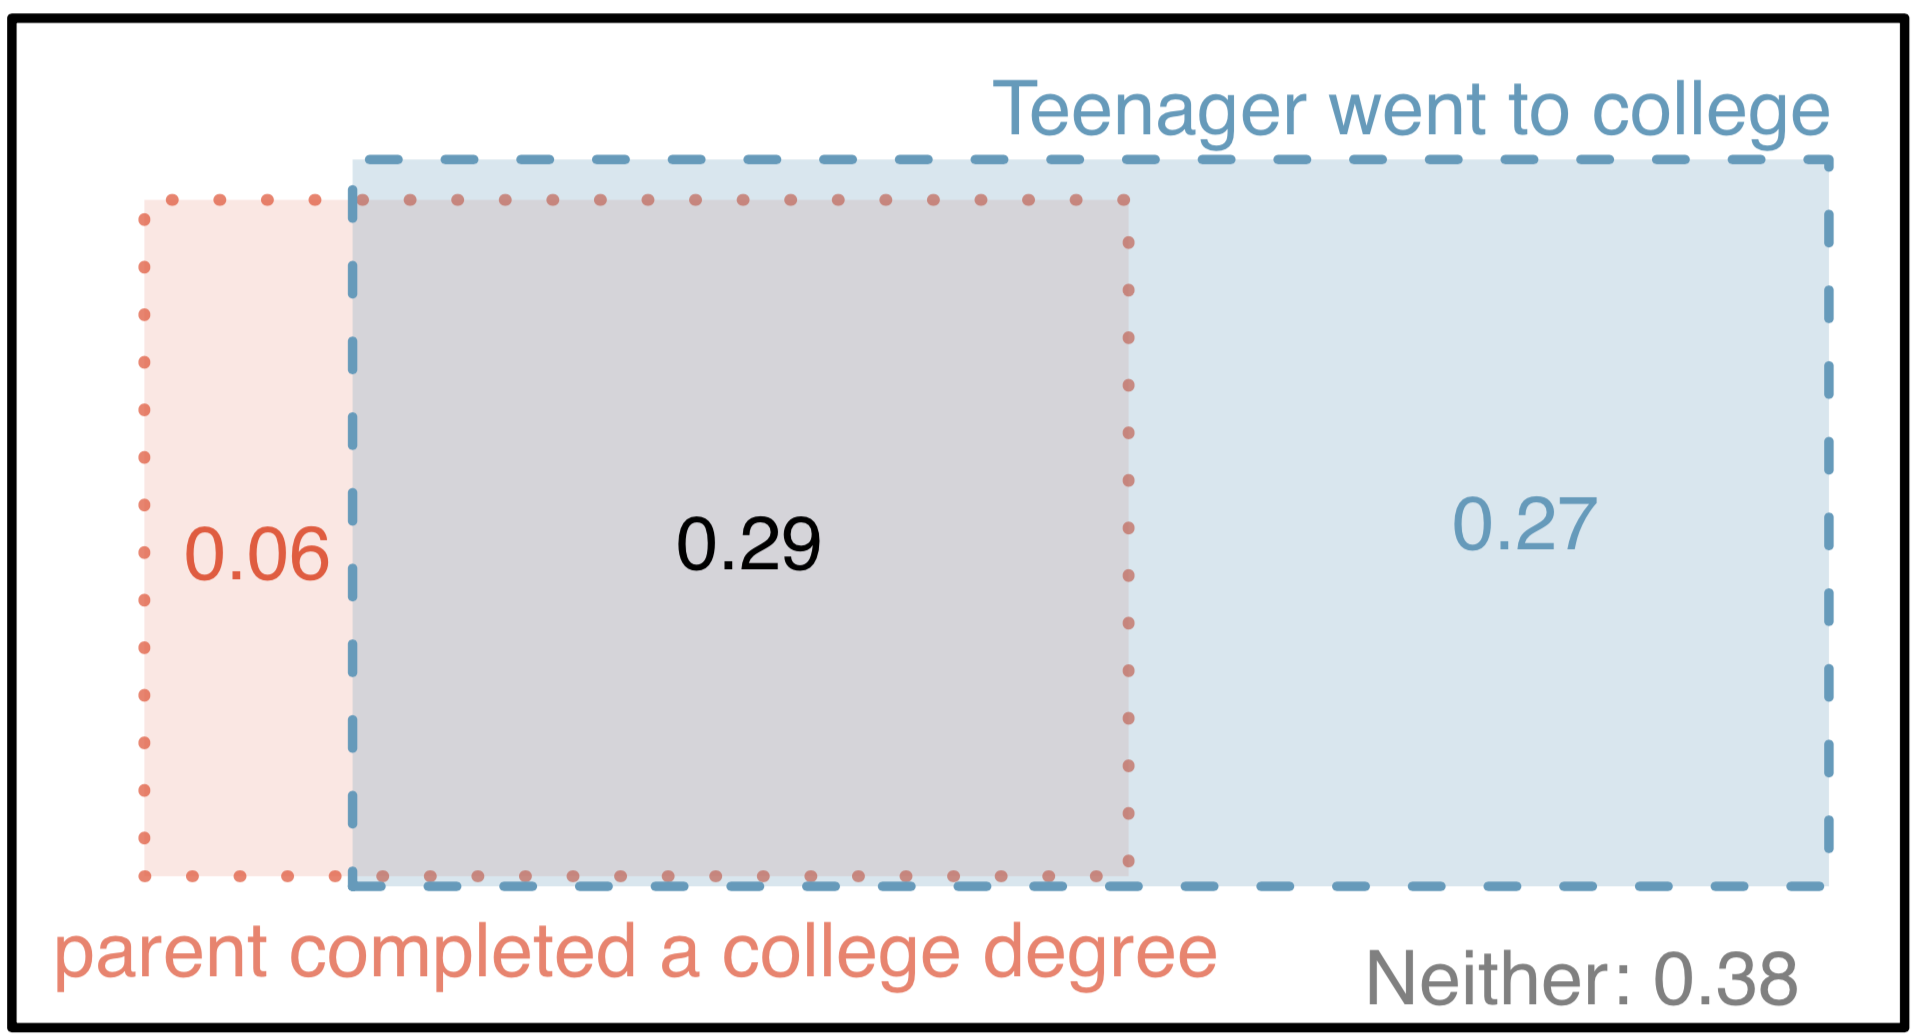
The image shows the data as follows:
- 38% of the sample represents those where neither parent or child completed a college degree.
- 29% of the sample represents those where both parent and child completed a college degree. 
- 27% of the sample represents those where parents did not complete a college degree, but their child did.
- 6% of the sample represents those where parents did complete a college degree, but their child did not.

Is there a connection between education level of parents and of the teenager? Is a college degree by a parent associated with college attendance of the teenager?

   * The probability that a random teenager from the study attended college and that at least one of the teen’s parents have a college degree - only 231 out of 280 cases:

$$P (teen\ college\ given\ parents\ degree) = 231 / 280 = 0.825$$

  * The probability that a random teenager from the study did not attend college and that at least one of the teen’s parents have a college degree - only 49 out of 280 cases:
  
$$P (teen\ college\ given\ parents\ degree) = 49 / 280 = 0.175$$

  * These are conditional probabilities because we computed the probability under a condition: a parent has a college degree
  * Notice that the conditional probabilities add up to 1.  
  
  *The conditional probabilities validate that there is a connection 
  
**Definitions:**
The conditional probability of the outcome of interest A given condition B is computed as the following:

$$
P(A\ |\ B)=\frac{P(A\cap B)}{P(B)}
$$

Note:
$P(A\cap B)$ is the intersection or in other words, A and B <br\>
| means given, $P(A\ |\  B)$ is 'the probability of A given (that) B (occurred).

Applying the general definition to our example

$$
P(Teen\  College\ |\ Parent\ Degree)=\frac{P(Teen\  College\cap Parent\ Degree)}{P(Parent\ Degree)}
$$

<a id='Marginal_and_Joint_Probabilities'></a>
## Marginal and Joint Probabilities

  * Joint probability:  Is the probability of simultaneous outcomes for two or more variables or processes.  Example:  The probability that the child went to college when their parent did not.   

$$
P (teen\ college\ and\ parents\ not) = P (teen\ college \cap parents\ not)= \frac{214}{792} = 0.27
$$  

* Marginal Probability: If a probability is based on a single variable, it is a marginal probability. Example:  a probability based solely on the teen variable is a marginal probability.    

$$
P (teen\ college) = P(teen\ college \cap Parent\ degree) + P(teen\ college \cap Parent\ not) = \frac{231}{792} + \frac{214}{792}=\frac{445}{792} = 0.56
$$

The name marginal comes from the fact that they are located in the margin of probabilities tables.

<a id='The_general_multiplication_rule'></a>
## The general multiplication rule

From the definition of conditional probability

<br/>
$$
P(A\cap B)=P(A\ |\ B) \cdot P(B)
$$

<br/>
When **events A and B are independent**, the probability of event A is not impacted by the occurrence event B and viceversa, the following applies:

<br/>
$$
P(A\ |\ B)=P(A)\ \ \ \ and\ \ \  \ P(B\ |\ A)=P(B)
$$
<br/>

So, we can conclude that in the special case of independent events
<br/>

$$
P(A\cap B)=P(A) \cdot P(B)
$$

<a id='Sum_of_conditional_probabilities'></a>
## Sum of conditional probabilities

Let $A_1$, ..., $A_k$ represent all the disjoint outcomes for a variable or process A. Then if B is an event, possibly for another variable or process, we have:

$$
P(A_1|B) + ··· + P(A_k|B) = 1
$$

The rule for complements also holds when an event and its complement are conditioned on the same information:

$$
P(A|B) = 1 - P(A^c|B)
$$

<a id='Independence_considerations_in_conditional_probability'></a>
## Independence considerations in conditional probability

If two events are independent, then knowing the outcome of one should provide no in- formation about the other. We can show this is mathematically true using conditional probabilities.

From the definition of conditional probability

<br/>
$$
P(A\cap B)=P(A\ |\ B) \cdot P(B)
$$

<br/>
When events A and B are independent, the probability of event A is not impacted by the occurrence event B and viceversa

<br/>
$$
P(A\ |\ B)=P(A)\ \ \ \ and\ \ \  \ P(B\ |\ A)=P(B)
$$
<br/>

In the special case of independent events
<br/>

$$
P(A\cap B)=P(A) \cdot P(B)
$$


The guided practice 2.50 in the textbook illustrates an example of rolling two dice.  The output of one die tells us nothing of the output of the second die.  Suppose we are calculating the probability that both dice yield 1.

$$
P(A=1 \ and \ B=1)=P(A=1 \cap B=1)=P(A=1)\cdot P(B=1)
$$

Let use this equation when solving for the conditional probability:

$$P(Y=1|X=1) = \frac{P(Y=1 \ and \ X=1)}{P(X =1)}=\frac{P(Y=1) \cdot P(X=1)}{P(X=1)}=P(Y=1)$$

**End of Part 2**.

This notebook makes up one part of this module. Now that you have completed this part, please proceed to the next notebook in this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

# References

Dice Distribution (bar).svg. (2006). Retrieved on Dec 5, 2018 from Wikimedia commons. https://commons.wikimedia.org/wiki/File:Dice_Distribution_(bar).svg Public domain.

Diez, D., Barr, C. & Çetinkaya-Rundel, M. (2015). 2.19 Guided Practice in Chapter 2: Probability. OpenIntro Statistics (3rd Ed.). https://www.openintro.org/stat/textbook.php?stat_book=os

family_college data set in Diez, D., Barr, C. & Çetinkaya-Rundel, M. (2015). OpenIntro Statistics (3rd Ed.). https://www.openintro.org/stat/textbook.php?stat_book=os